In [1]:
# Load the necessary libraries and the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report,  confusion_matrix

In [2]:
# Load the data from the Excel file
df = pd.read_excel('glass.xlsx', sheet_name='glass')

In [3]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


### Exploratory Data Analysis (EDA)

In [4]:
# Check for missing values
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [5]:
# Descriptive statistics
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


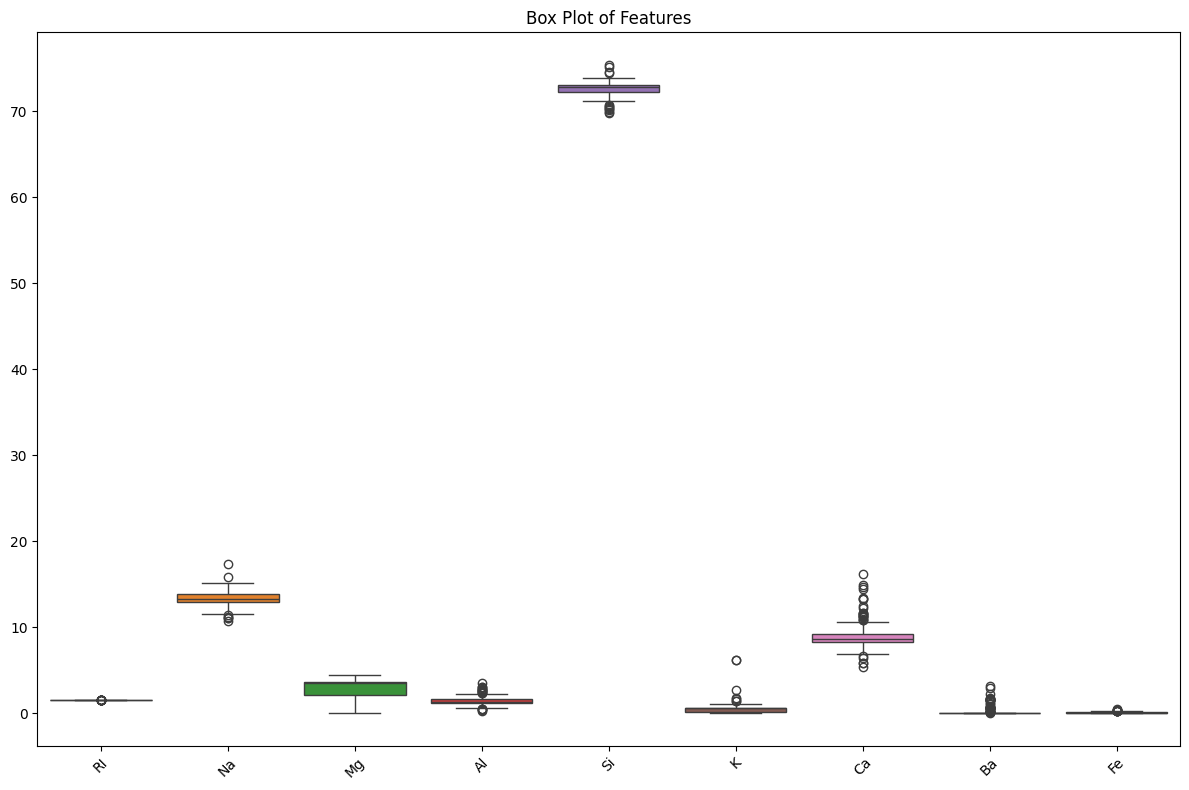

In [7]:
# Visualizations
plt.figure(figsize=(12, 8))
sns.boxplot(data=df.drop('Type', axis=1))
plt.title('Box Plot of Features')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

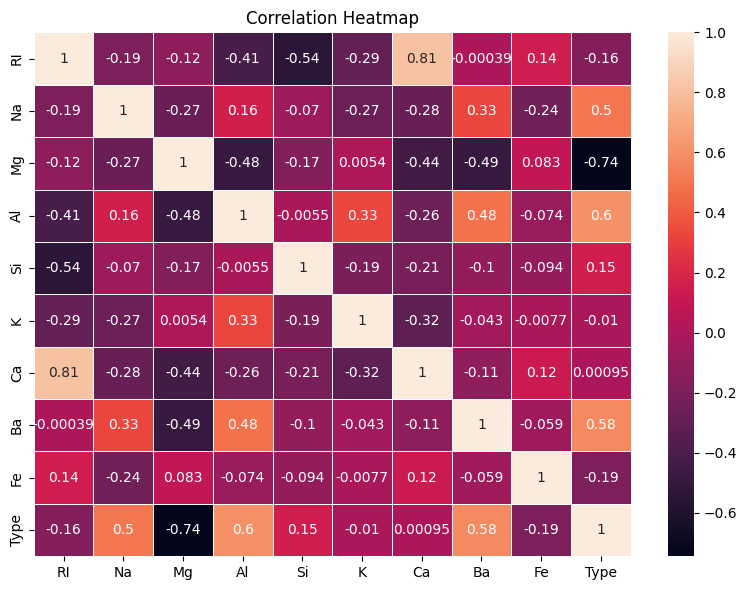

In [8]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, linewidths=0.5)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

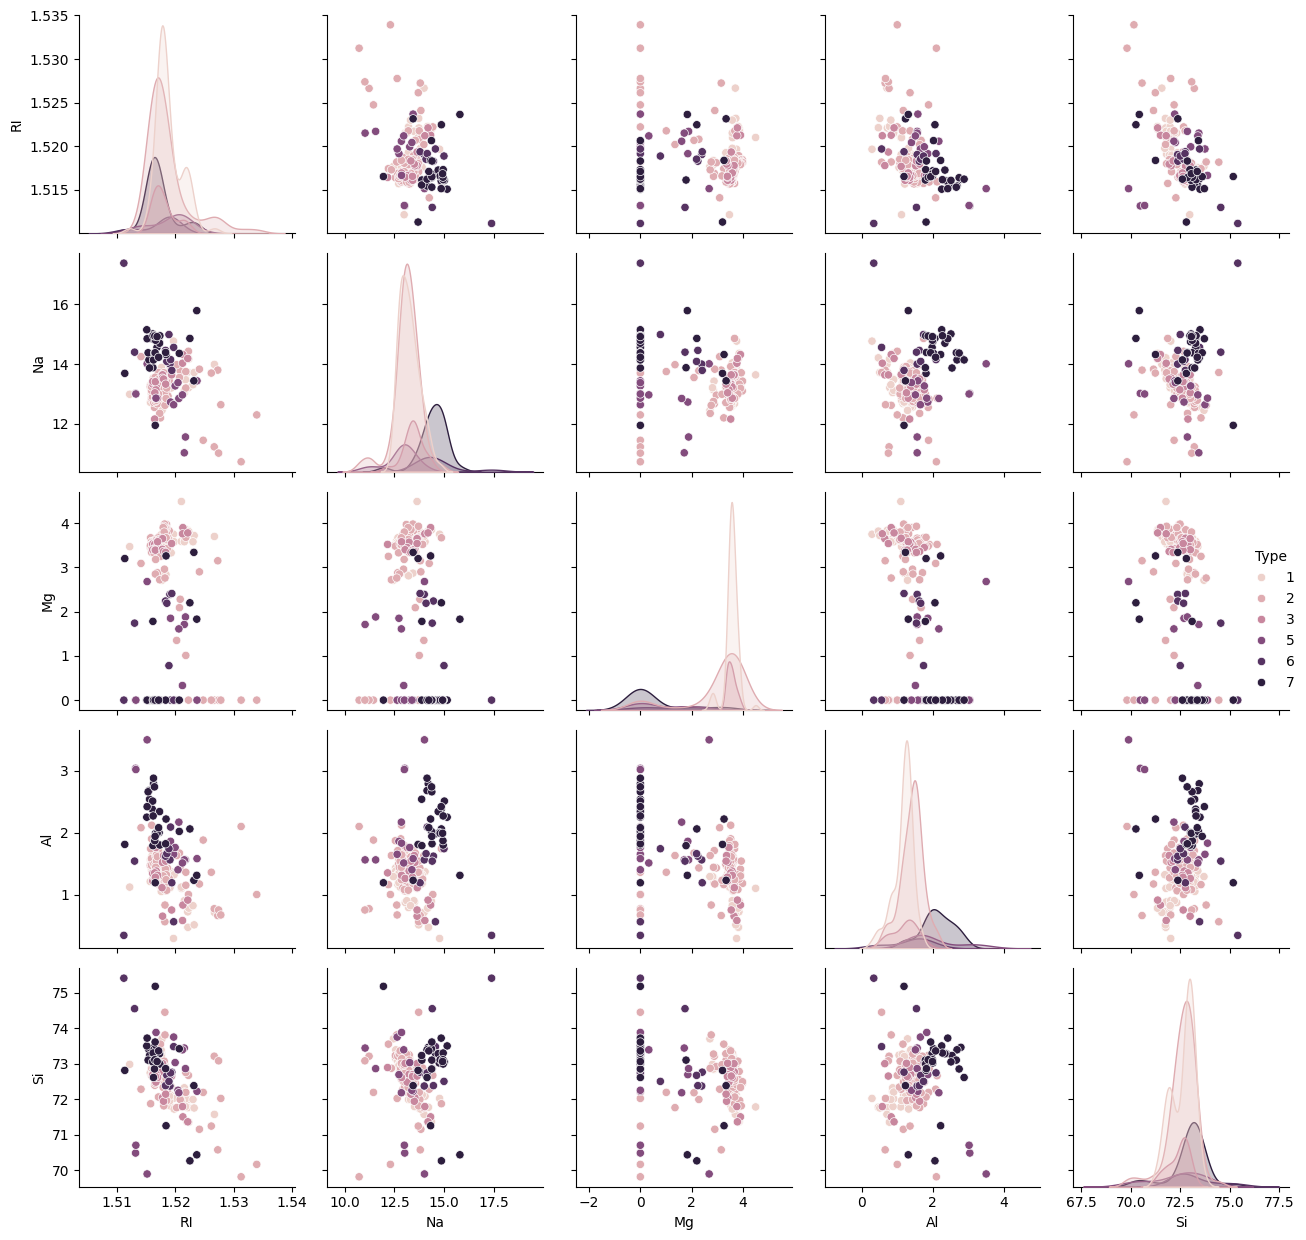

In [9]:
# Pair plot for selected features
sns.pairplot(df[['RI', 'Na', 'Mg', 'Al', 'Si', 'Type']], hue='Type')
plt.tight_layout()
plt.show()

### Data Preprocessing

In [10]:
# Separate features and target
features = df.drop('Type', axis=1)
target = df['Type']

# Apply feature scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
x_balanced, y_balanced = smote.fit_resample(scaled_features, target)

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x_balanced, y_balanced, train_size=0.8, random_state=42)


/Users/rushankpotadar/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [11]:
print("x_train",x_train.shape)
print("x_test",x_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

x_train (364, 9)
x_test (92, 9)
y_train (364,)
y_test (92,)


In [12]:
# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [13]:
# Train and evaluate random forest classifier
rf_pred = rf_model.predict(x_test) # Make predictions using the trained model and store it in rf_pred
print("\nRandom Forest Classification Report:") # Print the classification report
print(classification_report(y_test, rf_pred))


Random Forest Classification Report:
              precision    recall  f1-score   support

           1       0.87      0.76      0.81        17
           2       0.85      0.89      0.87        19
           3       0.83      1.00      0.91        10
           5       1.00      1.00      1.00        14
           6       1.00      1.00      1.00        14
           7       1.00      0.94      0.97        18

    accuracy                           0.92        92
   macro avg       0.93      0.93      0.93        92
weighted avg       0.93      0.92      0.92        92



In [14]:
# Train and evaluate Bagging Classifier
bagging_model = BaggingClassifier(n_estimators=100, random_state=42)
bagging_model.fit(x_train, y_train)

BaggingClassifier(n_estimators=100, random_state=42)

In [15]:
bagging_pred = bagging_model.predict(x_test)
print("\Bagging Classifier Classification Report:")
print(classification_report(y_test, bagging_pred))

\Bagging Classifier Classification Report:
              precision    recall  f1-score   support

           1       0.88      0.82      0.85        17
           2       0.89      0.89      0.89        19
           3       0.83      1.00      0.91        10
           5       1.00      1.00      1.00        14
           6       1.00      1.00      1.00        14
           7       1.00      0.94      0.97        18

    accuracy                           0.93        92
   macro avg       0.93      0.94      0.94        92
weighted avg       0.94      0.93      0.93        92



In [16]:
# Train and evaluate Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(x_train, y_train)

GradientBoostingClassifier(random_state=42)

In [17]:
gb_pred = gb_model.predict(x_test)
print("\Gradient Boosting Classification Report:")
print(classification_report(y_test, gb_pred))

\Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           1       0.88      0.82      0.85        17
           2       1.00      0.89      0.94        19
           3       0.77      1.00      0.87        10
           5       1.00      1.00      1.00        14
           6       1.00      1.00      1.00        14
           7       1.00      1.00      1.00        18

    accuracy                           0.95        92
   macro avg       0.94      0.95      0.94        92
weighted avg       0.95      0.95      0.95        92



In [20]:
# Evaluate Random Forest
rf_pred = rf_model.predict(x_test)
print("\nRandom Forest Performance:")
print("   - Accuracy  :", accuracy_score(y_test, rf_pred))
print("   - Precision :", precision_score(y_test, rf_pred, average='weighted'))
print("   - Recall    :", recall_score(y_test, rf_pred, average='weighted'))
print("   - F1-score  :", f1_score(y_test, rf_pred, average='weighted'))


# Evaluate Bagging Classifier
bagging_pred = bagging_model.predict(x_test)
print("\nBagging Classifier Performance:")
print("   - Accuracy  :", accuracy_score(y_test, bagging_pred))
print("   - Precision :", precision_score(y_test, bagging_pred, average='weighted'))
print("   - Recall    :", recall_score(y_test, bagging_pred, average='weighted'))
print("   - F1-score  :", f1_score(y_test, bagging_pred, average='weighted'))


# Evaluate Gradient Boosting
gb_pred = gb_model.predict(x_test)
print("\nGradient Boosting Performance:")
print("   - Accuracy  :", accuracy_score(y_test, gb_pred))
print("   - Precision :", precision_score(y_test, gb_pred, average='weighted'))
print("   - Recall    :", recall_score(y_test, gb_pred, average='weighted'))
print("   - F1-score  :", f1_score(y_test, gb_pred, average='weighted'))



Random Forest Performance:
   - Accuracy  : 0.9239130434782609
   - Precision : 0.926268115942029
   - Recall    : 0.9239130434782609
   - F1-score  : 0.9234046297904994

Bagging Classifier Performance:
   - Accuracy  : 0.9347826086956522
   - Precision : 0.9370471014492755
   - Recall    : 0.9347826086956522
   - F1-score  : 0.9347920195746282

Gradient Boosting Performance:
   - Accuracy  : 0.9456521739130435
   - Precision : 0.9518185618729097
   - Recall    : 0.9456521739130435
   - F1-score  : 0.9463515113326078


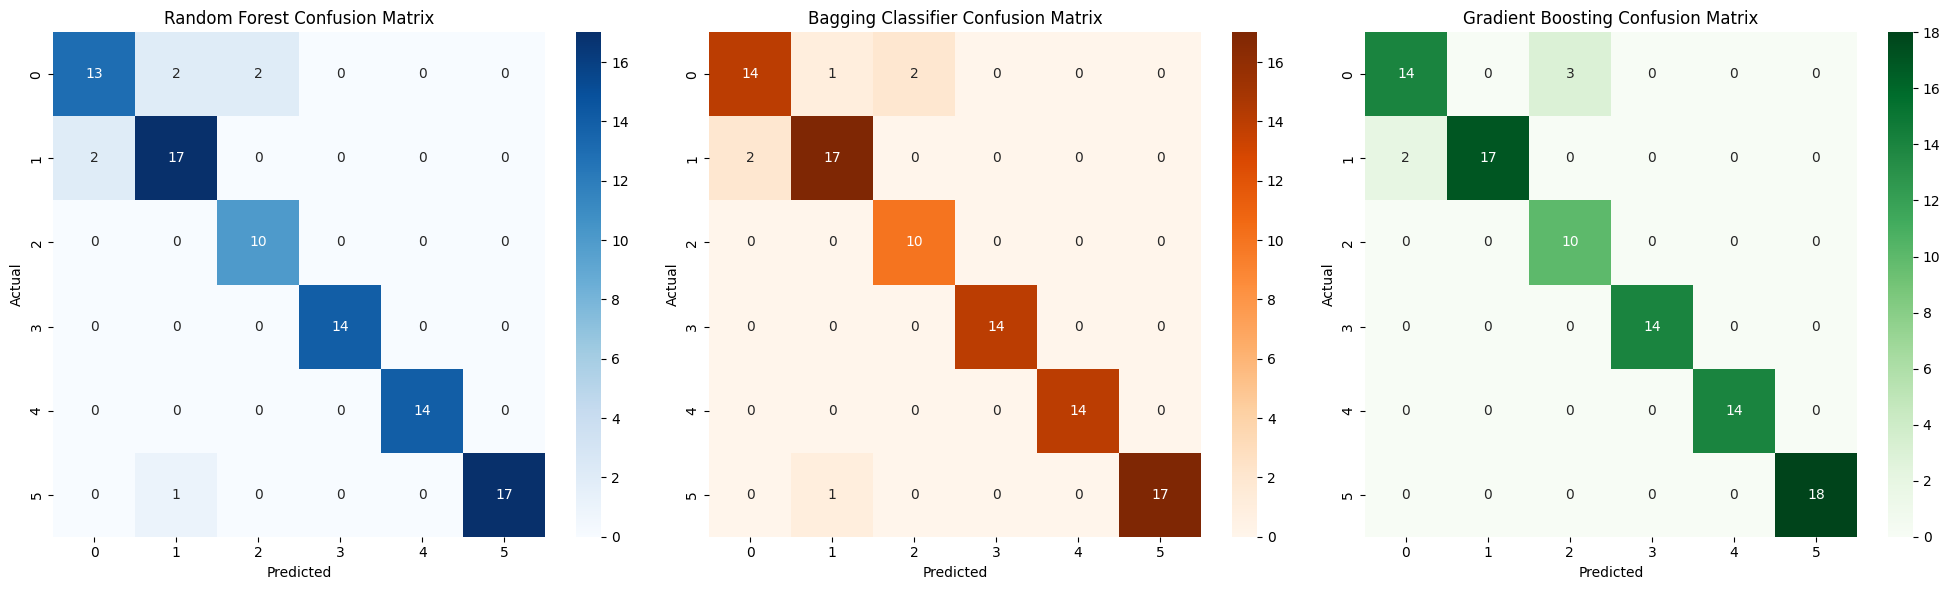

In [19]:
# Plot confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

sns.heatmap(confusion_matrix(y_test, rf_pred), annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Random Forest Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

sns.heatmap(confusion_matrix(y_test, bagging_pred), annot=True, fmt='d',cmap='Oranges', ax=axes[1])
axes[1].set_title('Bagging Classifier Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

sns.heatmap(confusion_matrix(y_test, gb_pred), annot=True, fmt='d', cmap='Greens', ax=axes[2])
axes[2].set_title('Gradient Boosting Confusion Matrix')
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('Actual')

plt.tight_layout()
plt.show()

### **1. Bagging vs. Boosting**  

#### **Bagging (Bootstrap Aggregating)**  
- Trains multiple models independently on random subsets (with replacement).  
- Reduces **variance**, preventing overfitting.  
- Example: **Random Forest** (ensemble of decision trees).  

#### **Boosting**  
- Trains models **sequentially**, where each model corrects previous errors.  
- Reduces **bias & variance**, improving accuracy.  
- Example: **AdaBoost, XGBoost, Gradient Boosting**.  


### **2. Handling Imbalanced Data**  

#### **Techniques:**  
1. **Resampling:**  
   - **Oversampling (SMOTE):** Generates synthetic minority samples.  
   - **Undersampling:** Removes excess majority class samples.  
2. **Algorithm Tweaks:**  
   - Use **cost-sensitive learning** (assign higher misclassification cost to the minority class).  
   - **Ensemble methods** (Balanced Random Forest, XGBoost with class weights).  
3. **Better Metrics:**  
   - Use **Precision, Recall, F1-score** instead of accuracy.  
   - **ROC-AUC & PR-AUC** for ranking model performance.  